In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
census_data = pd.read_csv(r"C:\Users\stuti\OneDrive\Desktop\india-districts-census-2011.csv")
census_data

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,...,94,588,71,101,172,74,10,84,15,1119
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,368,...,126,562,72,89,161,96,28,124,18,1066
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,...,46,122,15,22,37,20,14,34,17,242
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,56301,29935,18,...,27,114,12,18,30,19,3,22,7,214
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,163333,98391,556,...,78,346,35,50,85,59,8,67,12,629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,636,PONDICHERRY,Mahe,41816,19143,22673,36470,16610,19860,144,...,2316,4309,1370,838,2208,576,978,1554,1446,10027
636,637,PONDICHERRY,Karaikal,200222,97809,102413,154916,79903,75013,35348,...,1063,2408,665,340,1005,246,483,729,341,4890
637,638,ANDAMAN AND NICOBAR ISLANDS,Nicobars,36842,20727,16115,25332,15397,9935,0,...,685,1895,212,134,346,70,120,190,84,3151
638,639,ANDAMAN AND NICOBAR ISLANDS,North AND Middle Andaman,105597,54861,50736,78683,43186,35497,0,...,685,1895,212,134,346,70,120,190,84,3151


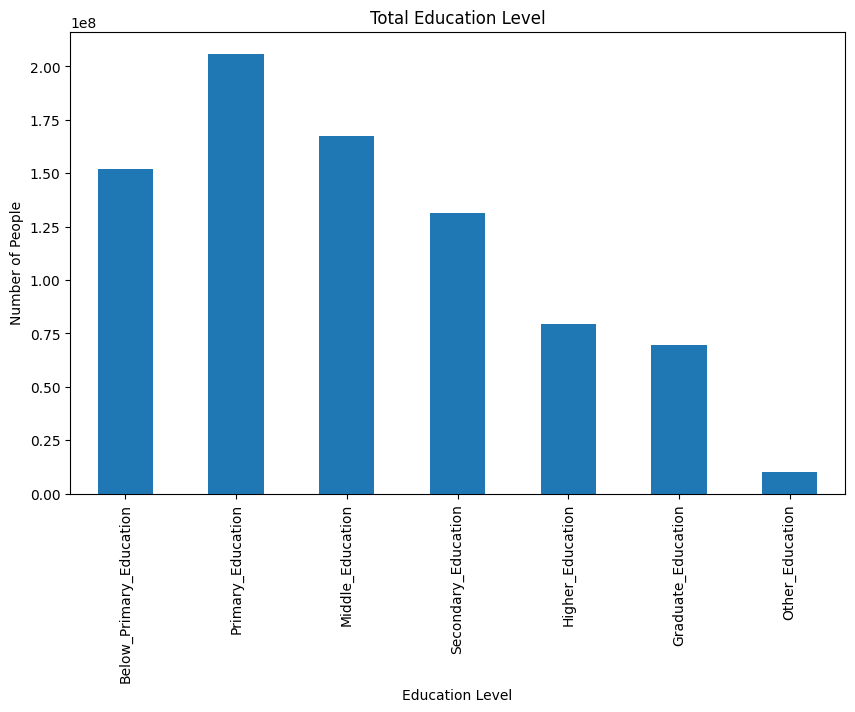

In [2]:
education_levels = census_data[['Below_Primary_Education', 'Primary_Education', 'Middle_Education', 'Secondary_Education', 'Higher_Education', 'Graduate_Education', 'Other_Education']].sum()
# Plot absolute numbers
plt.figure(figsize=(10, 6))
education_levels.plot(kind='bar')
plt.title('Total Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of People')
plt.show()

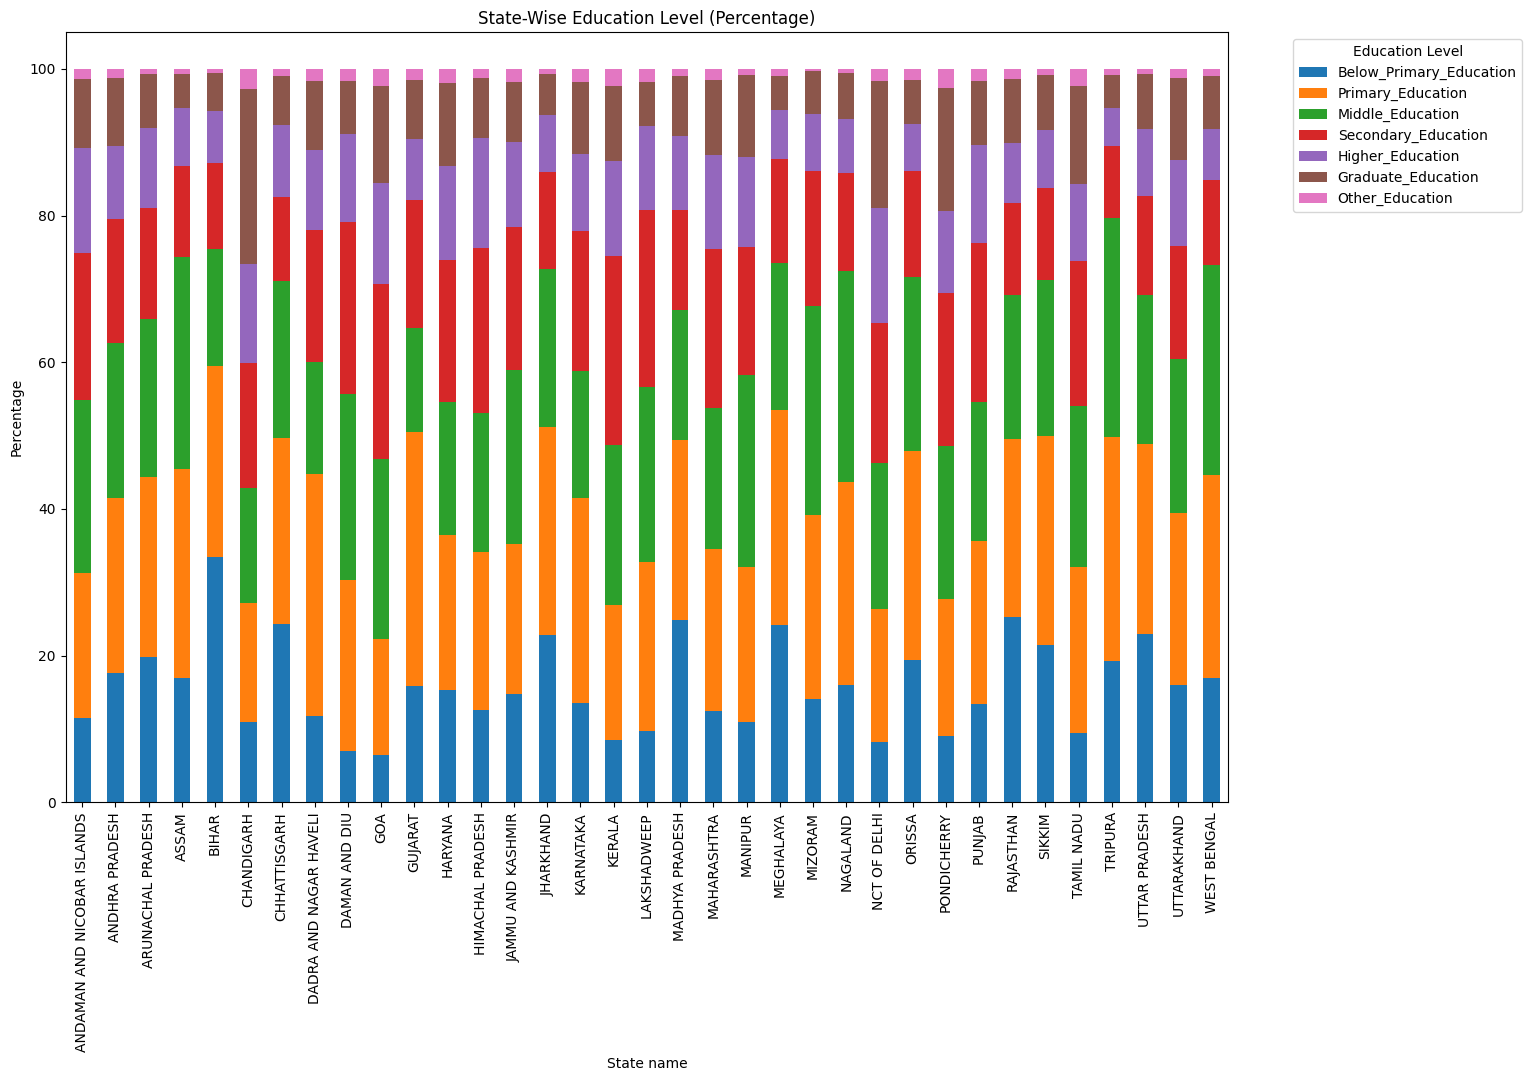

In [3]:
# Group by state and sum the education levels
state_education = census_data.groupby('State name')[['Below_Primary_Education', 'Primary_Education', 'Middle_Education', 'Secondary_Education', 'Higher_Education', 'Graduate_Education', 'Other_Education']].sum()

# Calculate percentages
state_education_percentage = state_education.div(state_education.sum(axis=1), axis=0) * 100

# Plotting state-wise education levels
state_education_percentage.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('State-Wise Education Level (Percentage)')
plt.xlabel('State name')
plt.ylabel('Percentage')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [8]:
# Get basic information about the dataset
print(census_data.info())

# Check for missing values
#census_data.isnull(r"C:\Users\stuti\OneDrive\Desktop\india-districts-census-2011.csv").sum()
print(census_data.isnull().sum())

# Display summary statistics
print(census_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Columns: 118 entries, District code to Total_Power_Parity
dtypes: int64(116), object(2)
memory usage: 590.1+ KB
None
District code                    0
State name                       0
District name                    0
Population                       0
Male                             0
                                ..
Power_Parity_Rs_330000_425000    0
Power_Parity_Rs_425000_545000    0
Power_Parity_Rs_330000_545000    0
Power_Parity_Above_Rs_545000     0
Total_Power_Parity               0
Length: 118, dtype: int64
       District code    Population          Male        Female      Literate  \
count     640.000000  6.400000e+02  6.400000e+02  6.400000e+02  6.400000e+02   
mean      320.500000  1.891961e+06  9.738598e+05  9.181011e+05  1.193186e+06   
std       184.896367  1.544380e+06  8.007785e+05  7.449864e+05  1.068583e+06   
min         1.000000  8.004000e+03  4.414000e+03  3.590000e+03  4.436000e+03   


In [9]:
# Fill missing values or drop them if necessary
census_data = census_data.dropna()

# Convert data types if needed
# For example, if population and education levels are not integers, convert them
census_data['Population'] = census_data['Population'].astype(int)
census_data['Total_Education'] = census_data['Total_Education'].astype(int)


In [10]:
# Group by city and calculate average education level
education_population = census_data.groupby('District name')[['Population', 'Total_Education']].mean()

# Correlation analysis
correlation = education_population.corr()
print('Correlation between population and Total_Education:\n', correlation)

# Perform any additional statistical analysis as needed

Correlation between population and Total_Education:
                  Population  Total_Education
Population          1.00000          0.99407
Total_Education     0.99407          1.00000
